In [1]:
import xarray as xr
import glob
import os
import re

import numpy as np
import dask
from tqdm import tqdm
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
wmt = xr.open_mfdataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-0189_wmt-daily.nc')
#ds = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/mhw_wmt_budget_103_0188-06-05-0188-06-10.nc')

In [3]:
wmts = xr.open_mfdataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/mhw_wmt_budget_25_0186-07-26-0186-08-23.nc')

In [4]:
wmts.sel(time_bounds=slice(wmts.time[0].values,wmts.time[-1].values))

<xarray.Dataset>
Dimensions:                                    (time: 29, thetao_l_target: 440,
                                                thetao_i_target: 441,
                                                time_bounds: 28, xh: 269,
                                                yh: 130)
Coordinates:
  * time                                       (time) object 0186-07-26 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-07-2...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
    geolat                                     (yh, xh) float32 dask.array<chunksize=(130, 269), meta=np.ndarray>
    geolon                                     (yh, xh) float32 dask.array<chunksize=(130, 269), meta=np.ndarray>
    areacello                                  (yh, xh) float32 dask.array<chunksize=(130, 269), meta=np.ndarray>
    deptho                                     (yh, xh) float32 dask.array<chunksize=(130, 269), meta=np.ndarray>
    lon                                        (yh, xh) float32 dask.array<chunksize=(130, 269), meta=np.ndarray>
    lat                                        (yh, xh) float32 dask.array<chunksize=(130, 269), meta=np.ndarray>
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
Data variables: (12/21)
    advection                                  (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    Eulerian_tendency                          (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    diffusion                                  (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    surface_ocean_flux_advective_negative_rhs  (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    frazil_ice                                 (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    dt                                         (time) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Leibniz_material_derivative                (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    spurious_numerical_mixing                  (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    advection_plus_BC                          (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>
    diabatic_advection                         (time, thetao_l_target) float64 dask.array<chunksize=(29, 440), meta=np.ndarray>

In [5]:
dsnovar = xr.Dataset(wmt.coords)
path = glob.glob('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/mhw_wmt_budget*')

mhwdataset = []

for files in path:
    #print(files)
    match = re.search(r"mhw_wmt_budget_(\d+)_", files)
    #print(match)
    if match:
        number = match.group(1)
        #print(number)
        var_name = int(number)
        #print(var_name)
        
    dsog = xr.open_dataset(files)
    dsog = dsog.expand_dims({'mhw':[var_name]})
    dsog = dsog.sel(time_bounds=slice(dsog.time[0].values,dsog.time[-1].values))
    ds = xr.combine_by_coords([dsnovar,dsog]).fillna(0)
    #print(ds)
    mhwdataset.append(ds)

mhwdataset = xr.concat(mhwdataset, dim='mhw')
mhwdataset

<xarray.Dataset>
Dimensions:                                    (mhw: 43, time: 1459,
                                                thetao_l_target: 440,
                                                time_bounds: 1459,
                                                thetao_i_target: 441, xh: 269,
                                                yh: 130)
Coordinates: (12/13)
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    ...                                         ...
    geolon                                     (yh, xh) float32 -137.4 ... -7...
    areacello                                  (yh, xh) float32 7.503e+08 ......
    deptho                                     (yh, xh) float32 4.806e+03 ......
    lon                                        (yh, xh) float32 -137.4 ... -7...
    lat                                        (yh, xh) float32 10.2 ... 39.07
  * mhw                                        (mhw) int64 3 6 25 ... 186 189
Data variables: (12/21)
    surface_ocean_flux_advective_negative_lhs  (mhw, time, thetao_l_target) float64 ...
    surface_exchange_flux                      (mhw, time, thetao_l_target) float64 ...
    diffusion                                  (mhw, time, thetao_l_target) float64 ...
    frazil_ice                                 (mhw, time, thetao_l_target) float64 ...
    Eulerian_tendency                          (mhw, time, thetao_l_target) float64 ...
    bottom_flux                                (mhw, time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (mhw, time, thetao_l_target) float64 ...
    dt                                         (mhw, time) float64 0.0 ... 0.0
    Leibniz_material_derivative                (mhw, time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (mhw, time, thetao_l_target) float64 ...
    advection_plus_BC                          (mhw, time, thetao_l_target) float64 ...
    diabatic_advection                         (mhw, time, thetao_l_target) float64 ...

In [11]:
budgets_sum = mhwdataset.sum('mhw')
budgets_sum

<xarray.Dataset>
Dimensions:                                    (time: 1459,
                                                thetao_l_target: 440,
                                                time_bounds: 1459,
                                                thetao_i_target: 441, xh: 269,
                                                yh: 130)
Coordinates:
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    geolat                                     (yh, xh) float32 10.2 ... 39.07
    geolon                                     (yh, xh) float32 -137.4 ... -7...
    areacello                                  (yh, xh) float32 7.503e+08 ......
    deptho                                     (yh, xh) float32 4.806e+03 ......
    lon                                        (yh, xh) float32 -137.4 ... -7...
    lat                                        (yh, xh) float32 10.2 ... 39.07
Data variables: (12/21)
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    diffusion                                  (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    bottom_flux                                (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 0.0 0.0 ... 0.0
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...

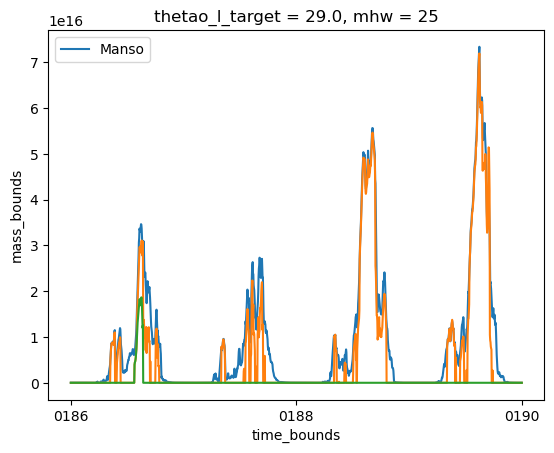

In [8]:
wmt.mass_bounds.sel(thetao_l_target=29,method="nearest").plot(label="Manso")
budgets_sum.mass_bounds.sel(thetao_l_target=29,method="nearest").plot()
mhwdataset.sel(mhw=25,method="nearest").mass_bounds.sel(thetao_l_target=29,method="nearest").plot()
plt.legend()

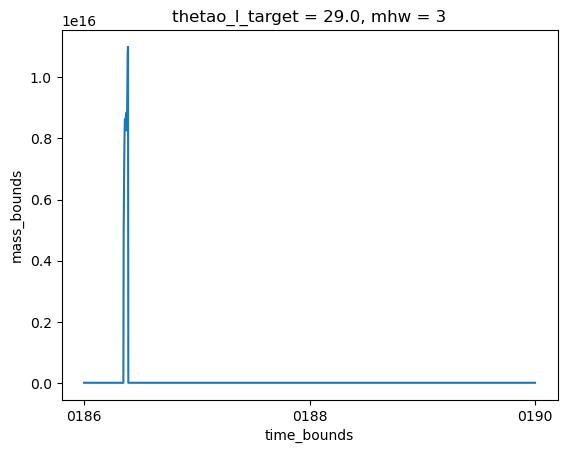

In [14]:
mhwdataset.sel(mhw=25,method="nearest").mass_bounds.sel(thetao_l_target=29,method="nearest").plot()

In [ ]:
dsog.mass_tendency.cumsum('time').sel(thetao_l_target=29,method='nearest').plot()
mass_tendency_anomaly.sel(thetao_l_target=29,method='nearest').plot()
(dsog.mass_tendency.cumsum('time')-mass_tendency_anomaly).sel(thetao_l_target=29,method='nearest').plot()

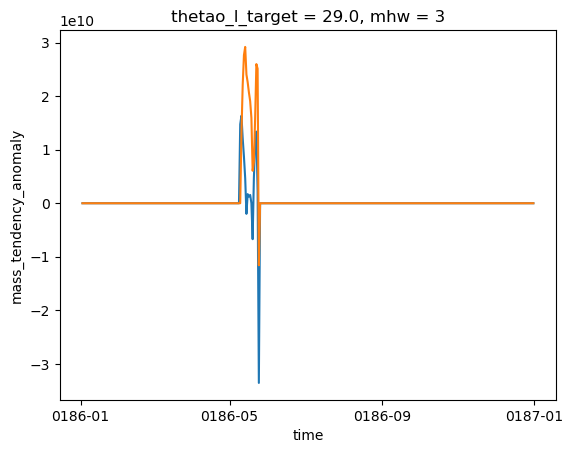

In [38]:
#wmt.mass_tendency.sel(thetao_l_target=29, method='nearest').plot()
mhwdataset.isel(mhw=0).mass_tendency.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()
mhwdataset.isel(mhw=0).mass_tendency_anomaly.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()

In [18]:
mass_tendency_mean = dsog.mass_tendency.mean('time')
mass_tendency_anomaly = (dsog.mass_tendency - mass_tendency_mean).cumsum('time')

In [20]:
mass_tendency_anomaly = (dsog.mass_tendency - mass_tendency_mean).cumsum('time')

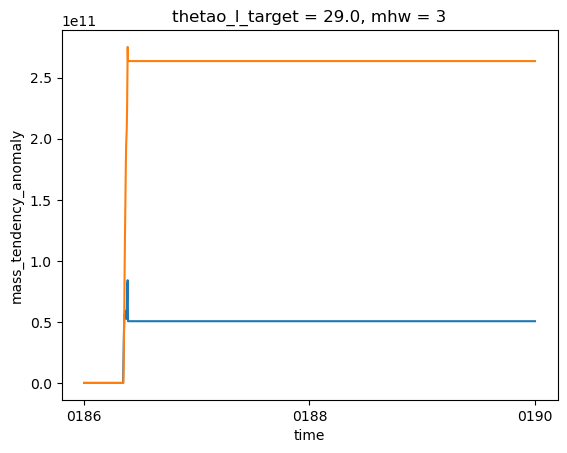

In [27]:
mhwdataset.isel(mhw=0).mass_tendency.cumsum('time').sel(thetao_l_target=29,method='nearest').plot()
mhwdataset.isel(mhw=0).mass_tendency_anomaly.cumsum('time').sel(thetao_l_target=29,method='nearest').plot()

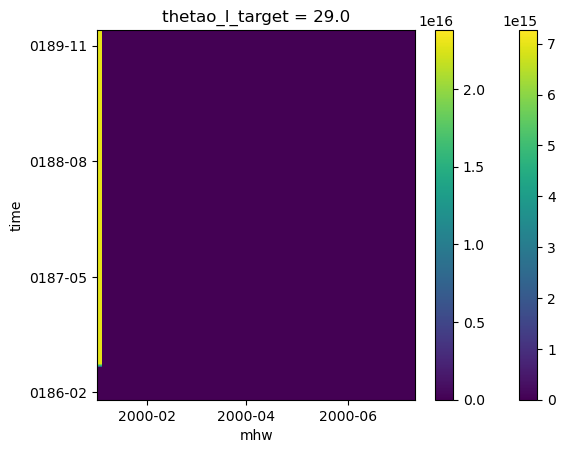

In [30]:
ΔMManso = (wmt['mass_tendency']*wmt.dt).cumsum('time').sel(thetao_l_target=29, method='nearest')
ΔMManso.plot()
ΔMMHW = (mhwdataset.isel(mhw=0)['mass_tendency']*mhwdataset.dt).cumsum('time').sel(thetao_l_target=29, method='nearest')
ΔMMHW.plot()
ΔMMHW_anomaly = (mhwdataset.isel(mhw=0)['mass_tendency_anomaly']*mhwdataset.dt).cumsum('time').sel(thetao_l_target=29, method='nearest')
ΔMMHW_anomaly.plot()

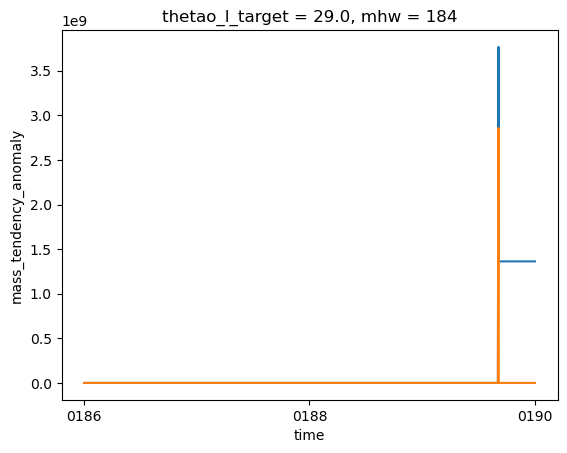

In [14]:
mhwdataset.isel(mhw=40).mass_tendency.cumsum('time').sel(thetao_l_target=29,method='nearest').plot()
mhwdataset.isel(mhw=40).mass_tendency_anomaly.sel(thetao_l_target=29,method='nearest').plot()
#(mhwdataset.isel(mhw=0).mass_tendency.cumsum('time')-mass_tendency_anomaly).sel(thetao_l_target=29,method='nearest').plot()

In [15]:
mhwdataset.attrs['mhw'] = 'Description of MHW ID number'

In [16]:
mhwdataset

<xarray.Dataset>
Dimensions:                                    (mhw: 43, time: 1459,
                                                thetao_l_target: 440,
                                                time_bounds: 1460,
                                                thetao_i_target: 441, xh: 269,
                                                yh: 130)
Coordinates: (12/13)
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    ...                                         ...
    geolon                                     (yh, xh) float32 -137.4 ... -7...
    areacello                                  (yh, xh) float32 7.503e+08 ......
    deptho                                     (yh, xh) float32 4.806e+03 ......
    lon                                        (yh, xh) float32 -137.4 ... -7...
    lat                                        (yh, xh) float32 10.2 ... 39.07
  * mhw                                        (mhw) int64 3 6 25 ... 186 189
Data variables: (12/22)
    surface_ocean_flux_advective_negative_lhs  (mhw, time, thetao_l_target) float64 ...
    surface_exchange_flux                      (mhw, time, thetao_l_target) float64 ...
    diffusion                                  (mhw, time, thetao_l_target) float64 ...
    frazil_ice                                 (mhw, time, thetao_l_target) float64 ...
    Eulerian_tendency                          (mhw, time, thetao_l_target) float64 ...
    bottom_flux                                (mhw, time, thetao_l_target) float64 ...
    ...                                         ...
    dt                                         (mhw, time) float64 0.0 ... 0.0
    Leibniz_material_derivative                (mhw, time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (mhw, time, thetao_l_target) float64 ...
    advection_plus_BC                          (mhw, time, thetao_l_target) float64 ...
    diabatic_advection                         (mhw, time, thetao_l_target) float64 ...
    mass_tendency_anomaly                      (mhw, time, thetao_l_target) float64 ...
Attributes:
    mhw:      Description of MHW ID number

In [12]:
#mhwdataset.to_netcdf('')
mhwdataset.to_netcdf(f'/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/mhw_wmt-budgets_mass-bounds_0186-0189.nc', mode='w')

In [ ]:
#plot 
for i in range(len(mhwdataset.mhw.values)):
    print(i)

    plt.figure()
    mhwdataset.isel(mhw=i).mass_tendency.plot()
    
    plt.show()